# Bernstein–Vazirani Algorithm

In this notebook, we study the Bernstein–Vazirani algorithm, another foundational quantum algorithm in the development of quantum computing. Like the Deutsch-Jozsa algorithm, which we have already introduced and analyzed [here](https://sohrabganjian.github.io/blog/2025/deutsch-jozsa-algorithm/), the Bernstein-Vazirani algorithm also utilizes Hadamard gates and oracle interactions. However, as we will see, the nature of their quantum speedups differs.

## Table of Contents

1. **Introduction**
2. **Bernstein–Vazirani Problem Statement**
3. **Algorithm**
4. **Proof of Correctness**
5. **Qiskit Implementation**
6. **Classical Algorithm**
7. **Quantum and Classical Comparison**

## Appendices

8. **Appendix 1: Biography**
9. **Appendix 2: References**
10. **Appendix 3: Bernstein–Vazirani Algoithm in `pytket`**

### Introduction 

Bernstien-Vazirani algorithm is a quantum algorithm developed by Ethan Bernstein and Umesh Vazirani. Similar to Deutsch-Jozsa algorithm, its input and output are the same: Boolean function $f(x): \{ 0,1 \}^n \rightarrow \{ 0,1 \} $. However, the problems they solve are different. The Bernstien-Vazirani algorithm revolves around finding a hidden parameter. Using quantum computers, like Deutsch-Jozsa algorithm, Bernstien-Vazirani algorithm requires making one query to the oracle to determine the hidden parameter, while in the classical case, $n$ queries are needed to find the hidden parameter. 

### Bernstein–Vazirani Problem Statement 

Let $f_s(x)$ be a Boolean function mapping $n$-bit strings to a single bit: 
$$f_s :\{ 0,1 \}^n \rightarrow \{ 0,1 \}.$$
The function is pormised to behave as:
$$
f_s(x) = x \cdot s \mod 2
$$
where $s$ is a hidden $n$-bit secret, and $\cdot$ denotes the bitwise inner product. That is, $x \cdot s = \left( x_1 \cdot s_1 \right) \oplus \left( x_2 \cdot s_2 \right) \oplus \dots \oplus \left( x_n \cdot s_n \right)$. The Bernstein–Vazirani problem seeks to determine the hidden string $s$ using the fewest possible queries to the oracle. 

### Algorithm

1. **Initialization**: Initialize the quantum circuit by creating $n$ qubits in the $|0\rangle$ state and one ancillary qubit in the $|1\rangle$ state. Obtain:
$$|\psi_0\rangle = |0\rangle^{\otimes n} \otimes |1\rangle.$$
2. **Hadamarad Layer**: Apply Hadamard gates to all qubits to create a superposition:
$$H^{\otimes n+1}|\psi_0\rangle = |\psi_1\rangle.$$
3. **Oracle Query**: The oracle $U_f$ is applied, performing the transformation:
$$U_f |\psi_1 \rangle = |\psi_2\rangle.$$
4.  **Second Hadamard Layer**: Applying Hadamard gates to the first  $n$ qubits results in:
$$(H^{\otimes n} \otimes I) |\psi_2 \rangle = |\psi_3\rangle$$
5. **Measurement**: Measurement of the first $n$ qubits is performed in the computational basis, Let $|\psi_3\rangle = |\phi\rangle \otimes |\Psi \rangle$, where $|\phi\rangle$ is the state of the first $n$ qubits and $| \Psi \rangle $ is the ancillary qubit. The probability of observing outcome $m \in \{ 0,1 \}^n$ is  
   $$p(m) = \langle \psi_3 | \left( |m\rangle \langle m | \otimes I \right) |\psi_3 \rangle = \left| \langle m | \phi \rangle \right|^2  $$
We will show that $m = s$. In other words, $p(m) = \delta_{m,s}$, where the Kronecker delta $\delta_{m,s}$ means $p(m) = 1$ only if $m = s$.

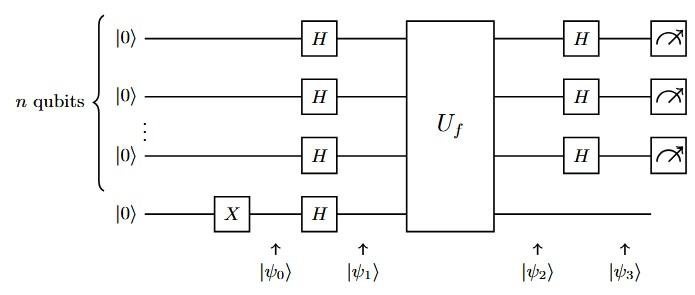

### Proof of Correctness

We begin by initializing the quantum system. The ancillary qubit is flipped from $|0\rangle$ to $|1\rangle$, leaving us with the initial state:


$$
\begin{aligned}
\left[ I^{\otimes n} \otimes X \right] |0\rangle^{\otimes n+1} &= |0\rangle^{\otimes n} |1\rangle \\
&= |\psi_0 \rangle
\end{aligned}
$$

Next, we apply a Hadamard transformation to all qubits, creating an equal superposition of all possible computational basis states:

$$
\begin{aligned}
H^{\otimes n+1} |\psi_0 \rangle &= H^{\otimes n+1} |0\rangle^{\otimes n} |1 \rangle \\
&= \frac{1}{\sqrt{2}^n} \sum\limits_{x \in \{ 0,1 \}^n } | x \rangle \frac{|0\rangle - |1\rangle}{\sqrt{2}} \\
&= |\psi_1 \rangle
\end{aligned}
$$

At this stage, we query the oracle $U_f$:

$$
\begin{aligned}
U_f |\psi_1\rangle &= U_f \left[ \frac{1}{\sqrt{2}^n} \sum\limits_{x \in \{0,1\}^n } |x\rangle \frac{|0\rangle - |1\rangle}{\sqrt{2}} \right] \\
&= \frac{1}{\sqrt{2}^n} \sum\limits_{x \in \{ 0,1 \}^n} |x\rangle \frac{ |f_s(x)\rangle - |1 \oplus f_s(x) \rangle }{\sqrt{2}} \\
&= \frac{1}{\sqrt{2}^n} \sum\limits_{x \in \{ 0,1 \}^n} |x\rangle \frac{ |x \cdot s \rangle - |1 \oplus (x \cdot s) \rangle }{\sqrt{2}}
\end{aligned}
$$

Since $x \cdot s$ can only take values $0$ or $1$, we rewrite the expression accordingly:

$$
\begin{aligned}
U_f |\psi_1\rangle &= \frac{1}{\sqrt{2}^n} \sum\limits_{x \in \{ 0,1 \}^n} |x\rangle \frac{ |x \cdot s \rangle - |1 \oplus (x \cdot s) \rangle }{\sqrt{2}} \\
&= \frac{1}{\sqrt{2}^n} \sum\limits_{x \in \{ 0,1 \}^n} \left( -1 \right)^{x \cdot s} |x\rangle \frac{ | 0 \rangle - |1  \rangle }{\sqrt{2}} \\
&= |\psi_2\rangle
\end{aligned}
$$

To extract $s$, we apply another Hadamard transformation to the first $n$ qubits:

$$
\begin{aligned}
\left[ H^{\otimes n} \otimes I \right] |\psi_2 \rangle 
&= \frac{1}{2^n} \sum\limits_{x \in \{ 0,1 \}^n} \sum\limits_{y \in \{ 0,1 \}^n} \left( -1 \right)^{x \cdot s} \left( -1 \right)^{x \cdot y} |y\rangle \frac{|0 \rangle - | 1 \rangle}{\sqrt{2}} \\
&= \frac{1}{2^n} \sum\limits_{y \in \{ 0,1 \}^n} \sum\limits_{x \in \{ 0,1 \}^n} \left( -1 \right)^{x \cdot s \oplus x \cdot y} |y\rangle \frac{|0 \rangle - | 1 \rangle}{\sqrt{2}} \\
&= \sum\limits_{y \in \{ 0,1 \}^n} \sum\limits_{x \in \{ 0,1 \}^n} \frac{1}{2^n} \left( -1 \right)^{x \cdot( s \oplus y )} |y\rangle \frac{|0 \rangle - | 1 \rangle}{\sqrt{2}}
\end{aligned}
$$

The probability of measuring outcome $y \in \{ 0,1 \}^n$ is:
$$
P( y ) = \left| \sum\limits_{ x \in \{ 0,1 \}^n } \frac{ \left( -1 \right)^{x \cdot (s \oplus y) }}{2^n} \right|^2.
$$

 - If $s \neq y$:
   Then given that $2^{n-1}$ of times $x \cdot (s \oplus y) = 0$, and the other $2^{n-1}$ of times $x \cdot (s \oplus y) = 1$, it follows that $P(y) = 0$. 

 - if $s = y$: Then $s \oplus y = s \oplus s = 2s = 0 \mod 2$ and $x \cdot 0 = 0$, hence $\sum\limits_{x \in \{ 0,1 \}^n } (-1)^0= \sum\limits_{x \in \{ 0,1 \}^n} 1 = 2^n$. Therefore, it follows that $P(y) = \left| \frac{2^n}{2^n} \right|^2 = 1$, hence the quantum state collapses to the state $s = y$, thereby revealing $s$. 

### Qiskit Implementation

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer

import random

In [2]:
def bv_oracle(secret_string):
    n = len(secret_string)
    oracle = QuantumCircuit(n+1)

    for wire_index, bit in enumerate(reversed(secret_string)):
        if bit == "1":
            oracle.cx(wire_index,n)

    return oracle

In [3]:
def bv_circuit(secret_string):
    n = len(secret_string)
    qc = QuantumCircuit(n+1, n)
    
    qc.x(n)
    qc.barrier()

    qc.h(range(n+1))
    qc.barrier()

    qc.append(bv_oracle(secret_string).to_gate(), range(n+1))
    qc.barrier()

    qc.h(range(n))

    qc.measure(range(n), range(n))

    return qc

In [4]:
secret_string = "010101"

In [5]:
qc = bv_circuit(secret_string)
qc.draw()

░ ┌───┐ ░ ┌──────────────┐ ░ ┌───┐┌─┐               
q_0: ──────░─┤ H ├─░─┤0             ├─░─┤ H ├┤M├───────────────
           ░ ├───┤ ░ │              │ ░ ├───┤└╥┘┌─┐            
q_1: ──────░─┤ H ├─░─┤1             ├─░─┤ H ├─╫─┤M├────────────
           ░ ├───┤ ░ │              │ ░ ├───┤ ║ └╥┘┌─┐         
q_2: ──────░─┤ H ├─░─┤2             ├─░─┤ H ├─╫──╫─┤M├─────────
           ░ ├───┤ ░ │              │ ░ ├───┤ ║  ║ └╥┘┌─┐      
q_3: ──────░─┤ H ├─░─┤3 circuit-163 ├─░─┤ H ├─╫──╫──╫─┤M├──────
           ░ ├───┤ ░ │              │ ░ ├───┤ ║  ║  ║ └╥┘┌─┐   
q_4: ──────░─┤ H ├─░─┤4             ├─░─┤ H ├─╫──╫──╫──╫─┤M├───
           ░ ├───┤ ░ │              │ ░ ├───┤ ║  ║  ║  ║ └╥┘┌─┐
q_5: ──────░─┤ H ├─░─┤5             ├─░─┤ H ├─╫──╫──╫──╫──╫─┤M├
     ┌───┐ ░ ├───┤ ░ │              │ ░ └───┘ ║  ║  ║  ║  ║ └╥┘
q_6: ┤ X ├─░─┤ H ├─░─┤6             ├─░───────╫──╫──╫──╫──╫──╫─
     └───┘ ░ └───┘ ░ └──────────────┘ ░       ║  ║  ║  ║  ║  ║ 
c: 6/═════════════════════════════════════════╩══╩══╩══╩══╩══╩═
                                              0  1  2  3  4  5

In [6]:
backend = Aer.get_backend('qasm_simulator')

In [7]:
compiled_circuit = transpile(qc, backend)

In [8]:
compiled_circuit.draw()

░ ┌───┐ ░                 ░ ┌───┐┌─┐               
q_0: ──────░─┤ H ├─░───■─────────────░─┤ H ├┤M├───────────────
           ░ ├───┤ ░   │             ░ ├───┤└╥┘┌─┐            
q_1: ──────░─┤ H ├─░───┼─────────────░─┤ H ├─╫─┤M├────────────
           ░ ├───┤ ░   │             ░ ├───┤ ║ └╥┘┌─┐         
q_2: ──────░─┤ H ├─░───┼────■────────░─┤ H ├─╫──╫─┤M├─────────
           ░ ├───┤ ░   │    │        ░ ├───┤ ║  ║ └╥┘┌─┐      
q_3: ──────░─┤ H ├─░───┼────┼────────░─┤ H ├─╫──╫──╫─┤M├──────
           ░ ├───┤ ░   │    │        ░ ├───┤ ║  ║  ║ └╥┘┌─┐   
q_4: ──────░─┤ H ├─░───┼────┼────■───░─┤ H ├─╫──╫──╫──╫─┤M├───
           ░ ├───┤ ░   │    │    │   ░ ├───┤ ║  ║  ║  ║ └╥┘┌─┐
q_5: ──────░─┤ H ├─░───┼────┼────┼───░─┤ H ├─╫──╫──╫──╫──╫─┤M├
     ┌───┐ ░ ├───┤ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘ ║  ║  ║  ║  ║ └╥┘
q_6: ┤ X ├─░─┤ H ├─░─┤ X ├┤ X ├┤ X ├─░───────╫──╫──╫──╫──╫──╫─
     └───┘ ░ └───┘ ░ └───┘└───┘└───┘ ░       ║  ║  ║  ║  ║  ║ 
c: 6/════════════════════════════════════════╩══╩══╩══╩══╩══╩═
                                             0  1  2  3  4  5

In [9]:
result = backend.run(compiled_circuit).result()

In [10]:
counts = result.get_counts()
print("Measurement outcome:", counts)

Measurement outcome: {'010101': 1024}


In [11]:
def run_bv_algorithm(secret_string):
    qc = bv_circuit(secret_string)

    backend = Aer.get_backend('qasm_simulator')
    compiled_circuit = transpile(qc, backend)
    result = backend.run(compiled_circuit).result()
    counts = result.get_counts()

    compiled_circuit.draw('mpl')  # Draws the circuit
    plot_histogram(counts)
    
    return counts, compiled_circuit

In [12]:
counts, qc = run_bv_algorithm("110")

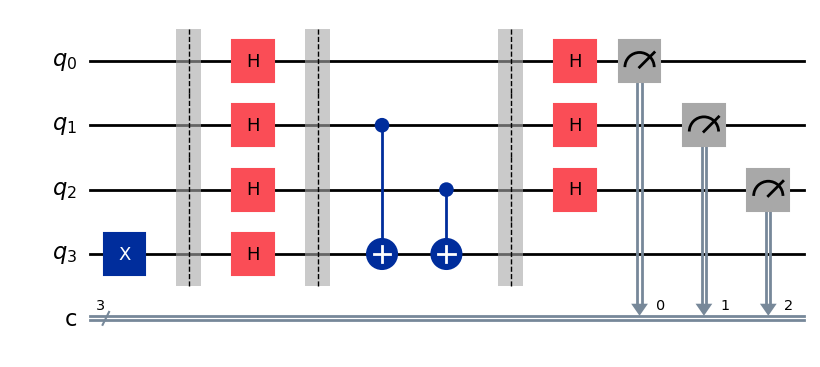

In [13]:
qc.draw('mpl')  # Draws the circuit

In [14]:
random_string = "".join([str(random.randint(0,1)) for i in range(5)])

In [15]:
counts, qc = run_bv_algorithm(random_string)

In [16]:
print(counts)

{'01110': 1024}


In [17]:
list(counts.keys())[0] == random_string

True

We observe that using quantum Bernstein-Vazirani algorithm, the Bernstein-Vazirani problem is solved using only one query! 

### Classical Algorithm

To solve the Bernstein-Vazirani algorithm with a classical approach, we query the oracle with carefully chosen inputs. Each query extracts one bit of $s$, requiring a total of $n$ queries.

$$
\begin{aligned}
f_s(100 \dots 0) &= \left( 1,0,0, \dots, 0 \right) \cdot s = (1 \cdot s_1) \oplus (0 \cdot s_2) \oplus \dots \oplus (0 \cdot s_n) = s_1 \\
f_s(010 \dots 0) &= \left( 0,1,0, \dots, 0 \right) \cdot s = (0 \cdot s_1) \oplus (1 \cdot s_2) \oplus \dots \oplus (0 \cdot s_n) = s_2 \\
\vdots \\
f_s(000 \dots 1) &= \left( 0,0,0, \dots, 1 \right) \cdot s = (0 \cdot s_1) \oplus (0 \cdot s_2) \oplus \dots \oplus (1 \cdot s_n) = s_n
\end{aligned}
$$

Since each query extracts exactly one bit of $s$, we require $n$ oracle calls to fully recover $s$.

### Quantum and Classical: Complexity Comparison

Therefore, the time complexity of solving the Bernstein-Vazirani problem is $\mathcal{O}(n)$ using classical computers and $\mathcal{O}(1)$ using quantum computers.Unlike the Deutsch-Jozsa algorithm, the classical complexity for Bernstein-Vazirani remains the same across the best, worst, and average cases. Hence, Bernstein-Vazirani algorithm serves as a linear speedup over its classical counterpart. 

Note that  the circuit structure of the Deutsch-Jozsa and Bernstein-Vazirani algorithms is identical: an $X$ gate is applied to the ancillary qubit, followed by a Hadamard layer, then the oracle, another Hadamard layer, and finally, measurement of the first $n$ qubits.

The main difference lies in how the oracle $U_f$ is defined. This implies, that for different oracles, we observe different speedups: exponential vs linear.

This raises an intriguing question: Can we design other oracles that enable speedup while using the same circuit architecture? If so, what conditions must these oracles satisfy?

For further discussions on quantum speedups enabled by oracle functions, lower bounds on quantum advantages, and separations between quantum and classical computation, see:

 - [Quantum Lower Bounds by Polynomials](https://arxiv.org/abs/quant-ph/9802049) by Robert Beals, Harry Buhrman, Richard Cleve, Michele Mosca, Ronald de Wolf. 1998.
 - [Quantum Lower Bound for the Collision Problem](https://arxiv.org/abs/quant-ph/0111102) by Scott Aaronson. 2001.
 - [Forrelation: A Problem that Optimally Separates Quantum from Classical Computing](https://arxiv.org/abs/1411.5729) by Scott Aaronson, Andris Ambainis. 2014.
 - [Oracle separation of BQP and PH](https://dl.acm.org/doi/10.1145/3313276.3316315) by Ran Raz, Avishay Tal. 2019. 

---
### Appendices
---

### Appendix 1: Biography

 - [Umesh Vazirani](https://en.wikipedia.org/wiki/Umesh_Vazirani) has been a professor at the  University of California, Berkeley. His research interests lie primarily in quantum computing, and he has supervised numerous distinguished researchers in the field, inclduing Dr. Ethan Bernstein, Dr. Scott Aaronson and Dr. Thomas Vidick. His work in quantum cryptography and complexity theory has shaped modern research on quantum security and device-independent protocols.

 - Ethan Bernstein, a student of Dr. Vazirani, made foundational contributions to quantum computing, particularly in quantum complexity theory.

---
### Appendix 2: References 


1. Ethan Bernstein and Umesh Vazirani *Quantum Complexity Theory.* In Proceedings of the 25th Annual ACM Symposium on Theory of Computing (STOC 1993, pp. 11–20, Association for Computing Machinery, New York, NY, 1993. DOI: [10.1145/167088.167097](https://doi.org/10.1145/167088.167097).  

2. Ethan Bernstein and Umesh Vazirani. *Quantum Complexity Theory.* SIAM Journal on Computing, Vol. 26, No. 5, pp. 1411–1473, 1997. DOI: [10.1137/S0097539796300921](https://doi.org/10.1137/S0097539796300921).<sup>1</sup>

<sup>1</sup> The 1997 SIAM Journal paper builds on the 1993 STOC conference version. As stated in the 1997 paper:  
*"A preliminary version of this paper appeared in Proc. 25th Annual ACM Symposium on Theory of Computing, Association for Computing Machinery, New York, NY, 1993, pp. 11–20."*

---

### Appendix 3: Bernstein–Vazirani Algoithm in `pytket`

`pytket` is a quantum programming framework developed by [Quantinuum](https://www.quantinuum.com/) in Python that provides a highly optimized, hardware-agnostic compiler for quantum circuits.

For more information, see: https://github.com/CQCL/pytket-quantinuum. 

In [18]:
from pytket import Circuit
from pytket.extensions.qiskit import AerBackend
from pytket.circuit.display import render_circuit_jupyter

In [19]:
def bv_oracle_tket(secret_string: str):
    n = len(secret_string)
    oracle = Circuit(n + 1)
    
    for wire_index, bit in enumerate(secret_string):
        if bit == "1":
            oracle.CX(wire_index, n)
    
    return oracle

In [20]:
def bv_circuit_tket(secret_string: str) -> Circuit:
    n = len(secret_string)
    qc = Circuit(n + 1, n)  # n+1 qubits, n classical bits
    
    # Initial state preparation
    qc.X(n)  # X gate on ancilla qubit
    
    # Add barrier (in pytket, barriers are mostly for visualization)
    qc.add_barrier(list(range(n + 1)))
    
    # Apply H gates to all qubits
    for i in range(n + 1):
        qc.H(i)
    
    qc.add_barrier(list(range(n + 1)))
    
    # Append oracle
    oracle = bv_oracle_tket(secret_string)
    qc.append(oracle)
    
    qc.add_barrier(list(range(n + 1)))
    
    # Apply H gates to all qubits except ancilla
    for i in range(n):
        qc.H(i)
    
    # Measure qubits (except ancilla)
    for i in range(n):
        qc.Measure(i, i) 
    
    return qc

In [21]:
# Run the circuit
secret_string = "010101"
circuit = bv_circuit_tket(secret_string)

In [22]:
render_circuit_jupyter(circuit)

In [23]:
backend = AerBackend()
compiled_circuit = backend.get_compiled_circuit(circuit)

# Run the circuit
shots = 1000
handle = backend.process_circuit(compiled_circuit)
result = backend.get_result(handle)

# Get counts
counts = result.get_counts()
print("Measurement outcome:", counts)

Measurement outcome: Counter({(0, 1, 0, 1, 0, 1): 1024})
